# 4IF Data Mining Lab

## Project detail
The project is to be carried out in pairs, during 3 practical sessions lasting 4h each. You will be
implementing code using Python, which is commonly used for most data mining tasks thanks
to many packages: `scikit-learn` (sklearn) providing many learning algorithms and clustering
algorithms, as well as `Natural Language Toolkit` (nltk) to tackle text processing tasks.
At the end of the project, you will deliver your code on moodle and a report, either
on a classical textual report format, or in the format of a recorded demo of your project (please
vote using this link). You should submit an experimentation report stating your main results (what
information you did find in the data and how could it be useful for Grand Lyon?), as well as
discussions about your different choices, showing your comprehension, scientific rigor and
methodology. Your report is expected to show your mastery of each of the pedagogical aims of
the project. A zoom on a functionality of your choice (a part of your project implementation
you are most proud of) is also asked to be provided.

## Discovering areas of interests using clustering

In [2]:
! source ./vitualenvpython/bin/activate
! which python3


/home/eleonore/Data-Mining-Lab-INSA-4IF/vitualenvpython/bin/python3


In [3]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
#maping library
! pip install folium
# association rules
! pip install mlxtend==0.23.3

! pip install nbformat==5.9.2 

In [4]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import folium
import numpy as np

In [5]:
data = pd.read_table("flickr_data2.csv", sep=",")
data.head()


/tmp/ipykernel_75828/787664013.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("flickr_data2.csv", sep=",")


id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title   date_taken_minute   date_taken_hour  \
0             Chaises avec vue                11.0                15   
1                          NaN                51.0                17   
2       59/365 - R46 V103 B163                29.0                17   
3  2010-01-29 Toiou Avott Lyon                15.0                20   
4  2010-01-28 Toiou Avott Lyon                10.0                20   

    date_taken_day   date_taken_month   date_taken_year  date_upload_minute  \
0               28                  2              2010                  23   
1               28                  2              2010                  52   
2               28                  2              2010                  33   
3               28                  1              2010                  38   
4               28                  1              2010                  38   

   date_upload_hour   date_upload_day   date_upload_month   date_upload_year  \
0                20              28.0                   2             2010.0   
1                17              28.0                   2             2010.0   
2                17              28.0                   2             2010.0   
3                12              28.0                   2             2010.0   
4                12              28.0                   2             2010.0   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   420240 non-null  int64  
 15   date_upload_year

In [7]:
unnamed_columns = data.columns[data.columns.str.contains('^Unnamed')]
data = data.loc[~data["Unnamed: 16"].notna(),:]
data = data.loc[~data["Unnamed: 17"].notna(),:]
data = data.loc[~data["Unnamed: 18"].notna(),:]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 420098 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420098 non-null  int64  
 1    user                420098 non-null  object 
 2    lat                 420098 non-null  float64
 3    long                420098 non-null  float64
 4    tags                316635 non-null  object 
 5    title               381777 non-null  object 
 6    date_taken_minute   420098 non-null  float64
 7    date_taken_hour     420098 non-null  int64  
 8    date_taken_day      420098 non-null  int64  
 9    date_taken_month    420098 non-null  int64  
 10   date_taken_year     420098 non-null  int64  
 11   date_upload_minute  420098 non-null  object 
 12   date_upload_hour    420098 non-null  object 
 13   date_upload_day     420098 non-null  float64
 14   date_upload_month   420098 non-null  int64  
 15   date_upload_year    4

In [8]:
data=data.drop(columns=unnamed_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420098 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420098 non-null  int64  
 1    user                420098 non-null  object 
 2    lat                 420098 non-null  float64
 3    long                420098 non-null  float64
 4    tags                316635 non-null  object 
 5    title               381777 non-null  object 
 6    date_taken_minute   420098 non-null  float64
 7    date_taken_hour     420098 non-null  int64  
 8    date_taken_day      420098 non-null  int64  
 9    date_taken_month    420098 non-null  int64  
 10   date_taken_year     420098 non-null  int64  
 11   date_upload_minute  420098 non-null  object 
 12   date_upload_hour    420098 non-null  object 
 13   date_upload_day     420098 non-null  float64
 14   date_upload_month   420098 non-null  int64  
 15   date_upload_year    4

## Cleaning Data

In [9]:
data=data.rename(columns=lambda x: x.strip())

<a id="missing-vals"></a>
### Missing Values

On voit que les valeurs nulles sont dans les tags ou le titre. Nous gardons les lignes correspondantes car cela ne nuit pas à l'analyse.

In [10]:
data[data['tags'].isna()]

id           user        lat      long tags            title  \
1        4394748717   35853470@N00  45.753270  4.862953  NaN              NaN   
65       4389518800   75445510@N00  45.754326  4.838790  NaN  The frozen pool   
122      4386110440   45717618@N00  45.769483  4.844723  NaN     Sirchamallow   
123      4386110178   45717618@N00  45.769483  4.844723  NaN          Savatte   
139      4382328538   35853470@N00  45.774059  4.811754  NaN              NaN   
...             ...            ...        ...       ...  ...              ...   
420230  45081045882   59715126@N05  45.731388  4.853333  NaN  20180810_204430   
420231  30192106127   59715126@N05  45.731388  4.853333  NaN  20180810_193521   
420232  44409275294   59715126@N05  45.731388  4.853333  NaN  20180810_193510   
420233  30192102867   59715126@N05  45.731388  4.852777  NaN  20180810_193509   
420236  44210748275  144146684@N04  45.762635  4.837299  NaN      white blood   

        date_taken_minute  date_taken_hour  date_taken_day  date_taken_month  \
1                    51.0               17              28                 2   
65                   24.0               15              16                 2   
122                  34.0               19              24                 2   
123                  34.0               19              24                 2   
139                  55.0               15              23                 2   
...                   ...              ...             ...               ...   
420230               44.0               20              10                 8   
420231               35.0               19              10                 8   
420232               35.0               19              10                 8   
420233               35.0               19              10                 8   
420236               36.0               16               5                10   

        date_taken_year date_upload_minute date_upload_hour  date_upload_day  \
1                  2010                 52               17             28.0   
65                 2010                 18                9             26.0   
122                2010                 58               23             24.0   
123                2010                 58               23             24.0   
139                2010                 58               15             23.0   
...                 ...                ...              ...              ...   
420230             2018               33.0                9              6.0   
420231             2018               33.0                9              6.0   
420232             2018               32.0                9              6.0   
420233             2018               32.0                9              6.0   
420236             2018               41.0               22              5.0   

        date_upload_month  date_upload_year  
1                       2            2010.0  
65                      2            2010.0  
122                     2            2010.0  
123                     2            2010.0  
139                     2            2010.0  
...                   ...               ...  
420230                 10            2018.0  
420231                 10            2018.0  
420232                 10            2018.0  
420233                 10            2018.0  
420236                 10            2018.0  

[103463 rows x 16 columns]

<a id="duplicates"></a>
### Duplicates

To check duplicated values, you can use the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) method. You can specify the paramater `keep` (`'first'`, `'last'`, `False`) to determine which duplicates (if any) to be maked as `True` in the resulting boolean Series indicating duplicate rows.

In [11]:
# check the duplicates
columns_for_duplicates=['user', 'lat', 'long','date_taken_hour', 'date_taken_day', 'date_taken_month','date_taken_year', 'date_upload_minute', 'date_upload_hour','date_upload_day', 'date_upload_month', 'date_upload_year']
data=data.drop_duplicates(subset=columns_for_duplicates)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125446 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  125446 non-null  int64  
 1   user                125446 non-null  object 
 2   lat                 125446 non-null  float64
 3   long                125446 non-null  float64
 4   tags                91437 non-null   object 
 5   title               112194 non-null  object 
 6   date_taken_minute   125446 non-null  float64
 7   date_taken_hour     125446 non-null  int64  
 8   date_taken_day      125446 non-null  int64  
 9   date_taken_month    125446 non-null  int64  
 10  date_taken_year     125446 non-null  int64  
 11  date_upload_minute  125446 non-null  object 
 12  date_upload_hour    125446 non-null  object 
 13  date_upload_day     125446 non-null  float64
 14  date_upload_month   125446 non-null  int64  
 15  date_upload_year    125445 non-null  fl

Save the cleaned DataFrame to `data/processed/data_cleaned.csv`.

In [13]:
# save to file
data.to_csv('./data_cleaned.csv',index=False)

In [14]:
m = folium.Map([45.762611,4.832805	], zoom_start=12)
data_cleaned=pd.read_csv('./data_cleaned.csv')
data_sample = data_cleaned.sample(1000)

for index, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"],row["long"]],
        icon=folium.DivIcon(html=f"""<svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="#8b0000"/>
        </svg>""")
    ).add_to(m)

m

To obtain the statistical summary of the dataframe, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). For different columns, it displays the count, the average value, the standard deviation, the min and max values, percentiles. 
By default, in mixed data types DataFrames, it displays the values for quantative data only:

In [15]:
# summarised statistics
data_cleaned.describe()

id            lat           long  date_taken_minute  \
count  1.254460e+05  125446.000000  125446.000000      125446.000000   
mean   1.943023e+10      45.764326       4.837631          29.425888   
std    1.415394e+10       0.023295       0.029666          17.576784   
min    3.066675e+08      45.655200       4.720312           0.000000   
25%    7.074664e+09      45.757508       4.826248          14.000000   
50%    1.421362e+10      45.762611       4.832805          30.000000   
75%    3.136933e+10      45.770404       4.842975          45.000000   
max    4.914809e+10      45.854950       5.006709          59.000000   

       date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
count    125446.000000   125446.000000     125446.000000    125446.000000   
mean         14.773440       15.126612          7.142603      2013.875979   
std           4.992425        8.672315          6.647027         6.502223   
min           0.000000        1.000000          1.000000        11.000000   
25%          12.000000        8.000000          4.000000      2012.000000   
50%          15.000000       14.000000          7.000000      2014.000000   
75%          18.000000       23.000000         10.000000      2017.000000   
max          23.000000       31.000000       2011.000000      2238.000000   

       date_upload_minute  date_upload_hour  date_upload_day  \
count       125446.000000     125446.000000    125446.000000   
mean            29.471294         14.687300        15.652416   
std             17.262952          6.615817         8.517743   
min              0.000000          0.000000         1.000000   
25%             15.000000         11.000000         9.000000   
50%             30.000000         16.000000        15.000000   
75%             44.000000         20.000000        23.000000   
max             59.000000         23.000000        31.000000   

       date_upload_month  date_upload_year  
count      125446.000000     125445.000000  
mean            6.847855       2014.238072  
std             6.715440          2.854888  
min             1.000000       2009.000000  
25%             4.000000       2012.000000  
50%             7.000000       2014.000000  
75%            10.000000       2017.000000  
max          2011.000000       2019.000000

In [16]:
index=data_cleaned[data_cleaned['date_taken_year']>2024].index
data_cleaned.drop(index=index,axis=1)
taken_years = data_cleaned["date_taken_year"].unique()
uploded_years = data_cleaned["date_upload_year"].unique()
print(f" When pictures are taken : {taken_years}\n")
print(f" When pictures are uploaded : {uploded_years}")



 When pictures are taken : [2010 2009 2007 2008 2006 2002 2004 2005 1976 1995 2012 1998 1989 1957
 1977 1979 2014 2001 1991 2011 2013   11 1980 2003 1985 1981 1997 1974
 2015 1926 1930 2238 1938 1935 1968 1972 1970 1983 1988 1973 2000 2017
 2016 1969 1993 2018 1982 1965 1996 1966 2019]

 When pictures are uploaded : [2010. 2009. 2011.   nan 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]


In [17]:
data_cleaned.to_csv('./data_cleaned.csv',index=False)
coordinates_df = data_cleaned[["id", "lat", "long"]]
coordinates_df

id        lat      long
0        4395181099  45.754858  4.821710
1        4394748717  45.753270  4.862953
2        4394694699  45.760655  4.846564
3        4394803790  45.784000  4.874072
4        4394566432  45.755940  4.833158
...             ...        ...       ...
125441  44402328654  45.758316  4.825197
125442  44210748275  45.762635  4.837299
125443  45122361361  45.763657  4.836012
125444  45073351222  45.763657  4.836012
125445  45122093111  45.758181  4.831967

[125446 rows x 3 columns]

## k-means Clustering and Find the Optimal Number of Clusters using Elbow Method

In [18]:
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull, QhullError
import folium
import pandas as pd

# Number of clusters
k = 100

# Fit a k-means model to the data
coordinates_df = pd.read_csv('./data_cleaned.csv')  # Assuming this is your coordinates DataFrame
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(coordinates_df[["lat", "long"]])

# Initialize the map
m = folium.Map(location=[45.762611, 4.832805], zoom_start=12)

# Sample data
data_sample = coordinates_df.sample(1000, random_state=42)

# Assign cluster labels
labels = kmeans.labels_
labels_sample = labels[data_sample.index]

# Group points by cluster
clustered_points = data_sample.assign(cluster=labels_sample)

# Define colors for clusters (extendable)
cluster_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#FFA500', '#800080']

# Track if any polygons are added
polygon_added = False

# Loop through each cluster and compute its perimeter
for cluster_id in clustered_points['cluster'].unique():
    cluster_points = clustered_points[clustered_points['cluster'] == cluster_id]
    points = cluster_points[['lat', 'long']].values  # Extract points as (lat, long)

    if len(points) >= 10:  # ConvexHull requires at least 3 points
        try:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Get the hull points
            
            # Add the perimeter as a polygon to the map
            folium.Polygon(
                locations=hull_points,
                color=cluster_colors[cluster_id % len(cluster_colors)],  # Use modulo for repeating colors
                weight=2,
                fill=True,
                fill_opacity=0.2
            ).add_to(m)
            polygon_added = True
        except QhullError:
            print(f"Cluster {cluster_id}: QhullError occurred; skipping hull computation.")
    else:
        print(f"Cluster {cluster_id}: Less than 10 points; skipping perimeter.")

# Add markers for the points
for _, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.DivIcon(html=f"""
        <svg width="10px" height="10px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
            <circle cx="12" cy="12" r="5" fill="black"/>
        </svg>
        """)
    ).add_to(m)

# Display the map
if not polygon_added:
    print("No polygons were added; adding a dummy marker.")
    folium.Marker(
        location=[45.762611, 4.832805],
        popup="Dummy Marker",
        icon=folium.Icon(color="red")
    ).add_to(m)

# Save and display the map
m.save("cluster_map.html")


Cluster 29: Less than 10 points; skipping perimeter.
Cluster 15: QhullError occurred; skipping hull computation.
Cluster 88: Less than 10 points; skipping perimeter.
Cluster 98: Less than 10 points; skipping perimeter.
Cluster 45: Less than 10 points; skipping perimeter.
Cluster 11: Less than 10 points; skipping perimeter.
Cluster 77: Less than 10 points; skipping perimeter.
Cluster 79: Less than 10 points; skipping perimeter.
Cluster 90: Less than 10 points; skipping perimeter.
Cluster 54: Less than 10 points; skipping perimeter.
Cluster 36: Less than 10 points; skipping perimeter.
Cluster 5: Less than 10 points; skipping perimeter.
Cluster 10: Less than 10 points; skipping perimeter.
Cluster 27: Less than 10 points; skipping perimeter.
Cluster 99: Less than 10 points; skipping perimeter.
Cluster 25: Less than 10 points; skipping perimeter.
Cluster 28: Less than 10 points; skipping perimeter.
Cluster 3: Less than 10 points; skipping perimeter.
Cluster 96: Less than 10 points; skipping

In [19]:
# k-means
from sklearn.cluster import KMeans

In [20]:
# number of clusters 
k = 7
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(coordinates_df[["lat", "long"]])

KMeans(n_clusters=7)

We can check the associated labels using `labels_` attribute.

In [21]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [3 0 3 ... 3 3 3]


To see the sum of squared distances of samples to their closest cluster center, use `inertia_` attribute:

In [22]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 32.71453913901055


### Affichage de la carte avec les clusters de differentes couleurs.

In [23]:
m = folium.Map([45.762611,4.832805	], zoom_start=12)
data_cleaned=pd.read_csv('./data_cleaned.csv')
data_sample = data_cleaned.sample(1000)

labels = kmeans.labels_
# Define SVG colors based on label
label_colors = {
    0: "#8b0000",
    1: "#FFFFFF",
    2: "#738a6c",
    3: "#0065a1",
    4: "#5c39bd",
    5: "#e56925",
    6: "#18e70b",
}

for index, row in data_sample.iterrows():
    cluster_label = labels[index]  # Get the label for the current row
    color = label_colors.get(cluster_label, "#000000")  # Default color if label not found

    # Add the marker to the map
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.DivIcon(html=f"""
        <svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
            <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{color}"/>
        </svg>
        """)
    ).add_to(m)

m

### Affichage des périmètres de cluster

In [24]:
len(labels)

125446

In [25]:
from scipy.spatial import ConvexHull, QhullError

# Number of clusters
k = 11

# Fit a k-means model to the data
coordinates_df = pd.read_csv('./data_cleaned.csv')  # Assuming this is your coordinates DataFrame
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(coordinates_df[["lat", "long"]])

# Initialize the map
m = folium.Map(location=[45.762611, 4.832805], zoom_start=12)

# Sample data
data_sample = coordinates_df.sample(1000, random_state=42)

# Assign cluster labels
labels = kmeans.labels_
labels_sample = labels[data_sample.index]

# Group points by cluster
clustered_points = data_sample.assign(cluster=labels_sample)

# Define colors for clusters (extendable)
cluster_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#FFA500', '#800080']

# Track if any polygons are added
polygon_added = False

# Loop through each cluster and compute its perimeter
for cluster_id in clustered_points['cluster'].unique():
    cluster_points = clustered_points[clustered_points['cluster'] == cluster_id]
    points = cluster_points[['lat', 'long']].values  # Extract points as (lat, long)

    if len(points) >= 3:  # ConvexHull requires at least 3 points
        try:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Get the hull points
            
            # Add the perimeter as a polygon to the map
            folium.Polygon(
                locations=hull_points,
                color=cluster_colors[cluster_id % len(cluster_colors)],  # Use modulo for repeating colors
                weight=2,
                fill=True,
                fill_opacity=0.2
            ).add_to(m)
            polygon_added = True  # Mark that a polygon was successfully added
        except QhullError:
            print(f"Cluster {cluster_id}: QhullError occurred; skipping hull computation.")
    else:
        print(f"Cluster {cluster_id}: Less than 3 points; skipping perimeter.")

# Add markers for all points
for _, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.DivIcon(html=f"""
        <svg width="10px" height="10px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
            <circle cx="12" cy="12" r="5" fill="black"/>
        </svg>
        """)
    ).add_to(m)

# Fallback: Add a dummy marker if no polygons are added
if not polygon_added:
    print("No polygons were added; adding a dummy marker.")
    folium.Marker(
        location=[45.762611, 4.832805],
        popup="Dummy Marker",
        icon=folium.Icon(color="red")
    ).add_to(m)

# Save and display the map
m.save("cluster_map.html")
m

Cluster 4: QhullError occurred; skipping hull computation.


This value can be used for finding the optimal number of clusters using the *Elbow method*. To do that let's vary the number of clusters `k`, apply k-means algorithm and store the corresponding intertia values. Then, let's plot the result and determine the best `k`.

**QUESTIONS**

* Find the optimal `k` using Elbow method

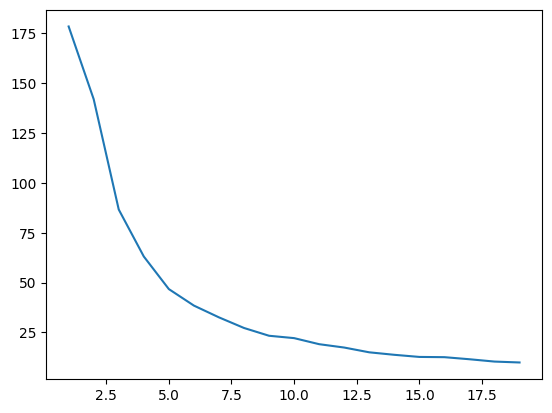

In [26]:
inertias = []
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(coordinates_df[["lat", "long"]])
  inertias.append(kmeans.inertia_)

plt.plot(range(1,20),inertias)
plt.show()

YOUR COMMENT: 5 because we can see the elbow

**QUESTIONS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=3`

In [27]:
data_cleaned["cluster kmeans"] = labels

data_cleaned

id           user        lat      long  \
0        4395181099   30624617@N03  45.754858  4.821710   
1        4394748717   35853470@N00  45.753270  4.862953   
2        4394694699   11817998@N05  45.760655  4.846564   
3        4394803790   11545749@N06  45.784000  4.874072   
4        4394566432   16197488@N06  45.755940  4.833158   
...             ...            ...        ...       ...   
125441  44402328654   90493526@N00  45.758316  4.825197   
125442  44210748275  144146684@N04  45.762635  4.837299   
125443  45122361361   95450872@N03  45.763657  4.836012   
125444  45073351222   95450872@N03  45.763657  4.836012   
125445  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
0                      chair,lyon,rhône,chaise,rhônealpes   
1                                                     NaN   
2                                              365,iphone   
3            nin,nineinchnails,gift,screening,toiou,avott   
4                   poste,lyon,streetphotography,rue,gens   
...                                                   ...   
125441  europe,france,lyon,croixrousse,streetart,wheat...   
125442                                                NaN   
125443  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
125444  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
125445  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
0                             Chaises avec vue               11.0   
1                                          NaN               51.0   
2                       59/365 - R46 V103 B163               29.0   
3                  2010-01-29 Toiou Avott Lyon               15.0   
4                                          NaN               57.0   
...                                        ...                ...   
125441  Pasted paper by Big Ben [Lyon, France]               18.0   
125442                             white blood               36.0   
125443         Lyon - Porte Passage de l'Argue               48.0   
125444               Lyon - Passage de l'Argue               48.0   
125445       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
0                    15              28                 2             2010   
1                    17              28                 2             2010   
2                    17              28                 2             2010   
3                    20              28                 1             2010   
4                    12              27                 2             2010   
...                 ...             ...               ...              ...   
125441               17              30                 9             2018   
125442               16               5                10             2018   
125443               19              27                 9             2018   
125444               19              27                 9             2018   
125445               14              28                 9             2018   

        date_upload_minute  date_upload_hour  date_upload_day  \
0                     23.0                20             28.0   
1                     52.0                17             28.0   
2                     33.0                17             28.0   
3                     38.0                12             28.0   
4                      1.0                10             28.0   
...                    ...               ...              ...   
125441                11.0                23              5.0   
125442                41.0                22              5.0   
125443                40.0                22              5.0   
125444                29.0                22              5.0   
125445                21.0                22              5.0   

        date_upload_month  d

## Task #5: Cluster Evaluation using Silhouette Coefficient

To evaluate the quality of the clustering, we can use **Silhouette Coefficient**. The Silhouette Coefficient for a sample is given by $(b - a) / max(a, b)$ where `b` is the distance between a sample and the nearest cluster that the sample is not a part of, and `a` is the mean intra-cluster distance (i.e. the mean distance between a sample and all other samples in the same cluster). 

The silhouette score ranges from -1 to 1 and indicates how well each data point fits within its assigned cluster:

* Score near +1 means:
    - The data point is far from neighboring clusters
    - The point is well-matched to its cluster
    - Indicates very distinct, well-separated clustering
* Score near 0 means:
    - The data point is close to the decision boundary between clusters
    - The point could potentially belong to either cluster
    - Suggests overlapping or not well-defined clusters
* Score near -1 means:
    - The data point might be assigned to the wrong cluster
    - The point is closer to points in another cluster than its own
    - Indicates poor clustering or potential misassignments

We can use [`sklearn.metrics.silhouette_score`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html) and [`sklearn.metrics.silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)

In [28]:
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples

**QUESTIONS**

* For k-means clustering with `k=3`, calculate Silhouette score for each data point, for each cluster and average silhouette score 
* Display Silhouette score plot
* Comment

In [29]:
kmeans=KMeans(n_clusters=3,init='k-means++')
for_silhouette_df = scaled_data_df.copy()
for_silhouette_df["labels"] = labels

for_silhouette_df = for_silhouette_df.sort_values(by=["labels"])

for_silhouette_df["silhouettes"] = silhouette_samples(for_silhouette_df[features],for_silhouette_df["labels"])

cluster_silhouette_score = for_silhouette_df.groupby(["labels"]).mean()["silhouettes"]

average_silhouette_score = for_silhouette_df["silhouettes"].mean()

NameError: name 'scaled_data_df' is not defined

In [186]:
import matplotlib.cm as cm

ValueError: 'x2' is not 1-dimensional

<Figure size 2000x2000 with 0 Axes>

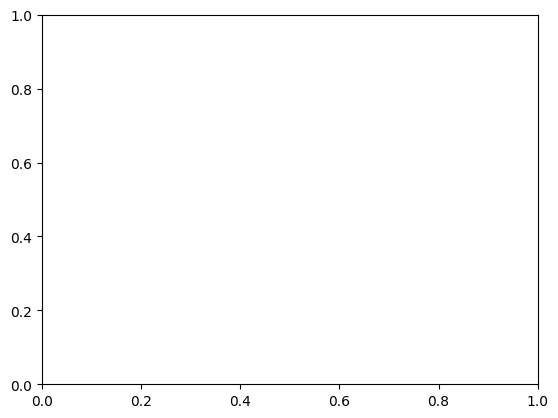

In [189]:
fig = plt.figure(figsize = (20,20))
fig, (ax1) = plt.subplots(1, 1)
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = for_silhouette_df.loc[for_silhouette_df["labels"] == i]

    ith_cluster_silhouette_values.sort_values(by=["silhouettes"])

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=average_silhouette_score, color="red", linestyle="--")

ax1.set_yticks([]) 
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
# ANSWER


As general guidelines, the plot can be interpreted by looking at:
* *the thickness of the clusters (number of points)*;
* check if any cluster has many negative values;
* check the consistency of the silhouette widths within clusters;
* the average value. Recall that in general, the following interpretation applies:
    - \> 0.7: Strong clustering structure
    - 0.5 - 0.7: Reasonable clustering structure
    - 0.25 - 0.5: Weak clustering structure
    - < 0.25: No substantial clustering structure


* Cluster Silhouette scores. 

YOUR COMMENT: TO COMPLETE

## Task 6: Apply Hierarchical Clustering

**QUESTIONS**

* Apply Agglomerative clustering with different linkage options: complete, average, single. 

*Hint*: use [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* For each linkage, draw a dendrogram.
* Calculate the silhouette scores

In [30]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [31]:
len(coordinates_df)
sample_coordinates_df = coordinates_df.sample(20000, random_state=42)

In [32]:
# ANSWER
clustering_single = AgglomerativeClustering(n_clusters=100, linkage='single').fit(coordinates_df[["lat", "long"]] )

In [43]:
print(clustering_single.labels_)

[11 11 11 ... 11 11 11]


Le Clustering Hiérarchique avec un linkage complete ou average demande trop de mémoire et crashe l'ordi, du passage de 5000 à 10 000 lignes dans un sample de coordinates_df. 

In [33]:
from scipy.spatial import ConvexHull, QhullError

# Assign cluster labels
labels = clustering_single.labels_
labels_sample = labels[data_sample.index]

# Group points by cluster
clustered_points = data_sample.assign(cluster=labels_sample)

# Define colors for clusters (extendable)
cluster_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#FFA500', '#800080']

# Track if any polygons are added
polygon_added = False

# Loop through each cluster and compute its perimeter
for cluster_id in clustered_points['cluster'].unique():
    cluster_points = clustered_points[clustered_points['cluster'] == cluster_id]
    points = cluster_points[['lat', 'long']].values  # Extract points as (lat, long)

    if len(points) >= 3:  # ConvexHull requires at least 3 points
        try:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Get the hull points
            
            # Add the perimeter as a polygon to the map
            folium.Polygon(
                locations=hull_points,
                color=cluster_colors[cluster_id % len(cluster_colors)],  # Use modulo for repeating colors
                weight=2,
                fill=True,
                fill_opacity=0.2
            ).add_to(m)
            polygon_added = True  # Mark that a polygon was successfully added
        except QhullError:
            print(f"Cluster {cluster_id}: QhullError occurred; skipping hull computation.")
    else:
        print(f"Cluster {cluster_id}: Less than 3 points; skipping perimeter.")

# Add markers for all points
for _, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.DivIcon(html=f"""
        <svg width="10px" height="10px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
            <circle cx="12" cy="12" r="5" fill="black"/>
        </svg>
        """)
    ).add_to(m)

# Save and display the map
m.save("cluster_map_clustering_single.html")
m

Cluster 36: QhullError occurred; skipping hull computation.
Cluster 49: Less than 3 points; skipping perimeter.
Cluster 10: Less than 3 points; skipping perimeter.
Cluster 88: Less than 3 points; skipping perimeter.
Cluster 66: Less than 3 points; skipping perimeter.
Cluster 97: Less than 3 points; skipping perimeter.
Cluster 27: Less than 3 points; skipping perimeter.
Cluster 30: Less than 3 points; skipping perimeter.
Cluster 23: Less than 3 points; skipping perimeter.
Cluster 98: Less than 3 points; skipping perimeter.


## Task 7: Apply DBSCAN

**QUESTIONS**

* Apply [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm
* Identify the best values for `eps` and `min_sanples` by varying the values within a range and by using Silhouette coefficient
* Apply DBSCAN with the best parameters found
* Print number of clusters and noise points

In [34]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
# ANSWER
clustering_db = DBSCAN(eps=0.7, min_samples=2).fit(coordinates_df[["lat", "long"]] )
clustering_db.labels_

In [ ]:
from scipy.spatial import ConvexHull, QhullError

# Assign cluster labels
labels = clustering_db.labels_
labels_sample = labels[data_sample.index]

# Group points by cluster
clustered_points = data_sample.assign(cluster=labels_sample)

# Define colors for clusters (extendable)
cluster_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#FFA500', '#800080']

# Track if any polygons are added
polygon_added = False

# Loop through each cluster and compute its perimeter
for cluster_id in clustered_points['cluster'].unique():
    cluster_points = clustered_points[clustered_points['cluster'] == cluster_id]
    points = cluster_points[['lat', 'long']].values  # Extract points as (lat, long)

    if len(points) >= 3:  # ConvexHull requires at least 3 points
        try:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Get the hull points
            
            # Add the perimeter as a polygon to the map
            folium.Polygon(
                locations=hull_points,
                color=cluster_colors[cluster_id % len(cluster_colors)],  # Use modulo for repeating colors
                weight=2,
                fill=True,
                fill_opacity=0.2
            ).add_to(m)
            polygon_added = True  # Mark that a polygon was successfully added
        except QhullError:
            print(f"Cluster {cluster_id}: QhullError occurred; skipping hull computation.")
    else:
        print(f"Cluster {cluster_id}: Less than 3 points; skipping perimeter.")

# Add markers for all points
for _, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.DivIcon(html=f"""
        <svg width="10px" height="10px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
            <circle cx="12" cy="12" r="5" fill="black"/>
        </svg>
        """)
    ).add_to(m)

# Save and display the map
m.save("cluster_map_clustering_single.html")
m

## Task 8: Cluster Characterisation using Apriori algorithm

Now, we would like to describe the obtained cluster. To do so, let's use frequent pattern mining and in particular **Apriori algorithm**. 

**QUESTIONS**
* First, convert numerical features to categorical (low, medium, high) based on quantiles. Add binary columns, e.g. `sepal length low`, `sepal length medium`, `sepal length high` depending on the values

In [ ]:
# ANSWER


To find association, we are going to use [mlxtend.frequent_patterns.apriori](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/).

In [ ]:
# frequent patterns
from mlxtend.frequent_patterns import apriori

**QUESTIONS**

* Use apriori algorithm to find frequent patterns for each cluster
* Then among these itemsets, find those that are not frequent for other clusters

In [ ]:
# ANSWER